# Enter Student Name & ID

In [1]:
student_id = 400101078 #@param {type:"integer"}
student_name = "Tina Halimi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101078
your name: Tina Halimi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num_components):

    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    X_reduced = np.dot(X_centered, selected_eigenvectors)
    
    return X_reduced 

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib as plt
from sklearn.datasets import load_iris

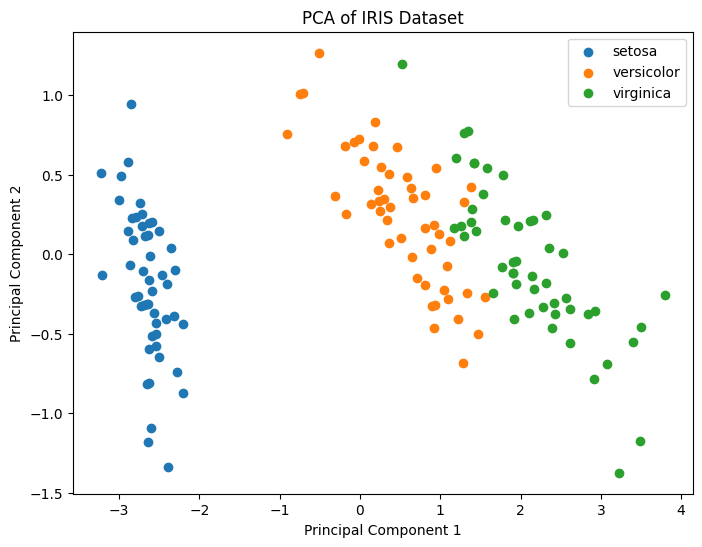

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

num_components = 2
X_reduced = myPCA(X, num_components)

plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_reduced[y == target, 0], X_reduced[y == target, 1], label=iris.target_names[target])

plt.title("PCA of IRIS Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

Eigenfaces are a technique used in the field of computer vision for human face recognition. They are derived from applying Principal Component Analysis (PCA) to a set of face images and represent the main features that distinguish different faces. By capturing the essential features of faces, eigenfaces provide a way to efficiently and effectively recognize and classify faces.

Face images contain a vast amount of information, not all of which is relevant for identifying a person. Some information might even mislead machine learning models. To accurately identify faces, it is beneficial to reduce the dimensionality of the data while retaining key facial features. This reduction aligns the data with the direction of eigenfaces, focusing on the most significant variations in face images.

**Relationship to PCA**:

Eigenfaces are closely related to PCA, a statistical technique used for dimensionality reduction. Here's how PCA is applied to face recognition to derive eigenfaces:

1. **Data Representation**:
   - Each face image is converted into a vector by concatenating its pixel values. For an image of size \(m \times n\), this results in a vector of length \(m \times n\).

2. **Preprocessing**:
   - Preprocessing steps are crucial to reduce irrelevant variations. Common steps include aligning the eyes, nose, and mouth, normalizing lighting, and adjusting poses. These steps ensure that the algorithm focuses on the appearance-related regions of the face and disregards other irrelevant parts.

3. **Centering the Data**:
   - Calculate the mean face vector from the dataset and subtract this mean from each face vector to center the data around the origin.

4. **Covariance Matrix**:
   - Construct the covariance matrix of the centered data. The covariance matrix captures the correlations between the various features (pixel values) of the faces.

5. **Eigenvectors and Eigenvalues**:
   - Compute the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components of the data, and in the context of face recognition, they are referred to as "eigenfaces."

6. **Dimension Reduction**:
   - Sort the eigenvectors by their corresponding eigenvalues in descending order. Select the top \(k\) eigenvectors to form a lower-dimensional subspace. These selected eigenvectors (eigenfaces) capture the most significant variations in the face images.

7. **Projection**:
   - Each face image can be projected onto this lower-dimensional subspace by calculating the dot product with the selected eigenfaces. This projection transforms the high-dimensional face image into a lower-dimensional representation.

8. **Recognition**:
   - For face recognition, the projection of a new face image onto the eigenface subspace is compared with the projections of known face images. The closest match in this lower-dimensional space is used to identify the face.

**Applications:**
1. **Face Recognition**: Eigenfaces are widely used in face recognition systems. By projecting a face image onto the eigenface space, a compact representation of the face is obtained, which can be compared with stored representations for recognition.
2. **Facial Feature Extraction**: Eigenfaces help in extracting meaningful features from face images that are useful in various computer vision tasks.
3. **Image Compression**: Eigenfaces can be used to compress face images by storing only the coefficients of the linear combination of the top eigenfaces.

**Summary**:

Eigenfaces are the eigenvectors derived from the covariance matrix of face images using PCA. They form a basis set that captures the main features of faces, allowing for dimensionality reduction. This approach enables efficient face recognition by comparing how different faces are represented in the lower-dimensional eigenface space. The preprocessing steps, such as aligning facial features and normalizing lighting, are crucial to ensure the algorithm focuses on relevant facial regions. By retaining the most significant features and reducing noise, eigenfaces provide a robust method for face recognition.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [ ]:
import os
import cv2

`pip install opencv-python`

In [6]:
dataset_path = 'ORL'

X_train = []
y_train = []
X_test = []
y_test = []

for person_id, person_folder in enumerate(os.listdir(dataset_path)):
    person_path = os.path.join(dataset_path, person_folder)
    
    if os.path.isdir(person_path):
        # Get sorted list of image filenames
        image_filenames = sorted(os.listdir(person_path))
        
        # Read images in sorted order
        for i, img_filename in enumerate(image_filenames):
            img_path = os.path.join(person_path, img_filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Check if the image was successfully read
            if img is not None:
                if i < 5:
                    X_train.append(img.flatten())
                    y_train.append(person_id)
                else:
                    X_test.append(img.flatten())
                    y_test.append(person_id)
            else:
                print(f"Warning: Could not read image {img_path}")

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [7]:
# # Normalize the data
# mean_X_train = np.mean(X_train, axis=0)
# X_train_centered = X_train - mean_X_train
# X_test_centered = X_test - mean_X_train

# # Perform PCA on the training data and reduce to 40 components
# num_components = 40
# X_train_pca = myPCA(X_train_centered, num_components)

# # Project the test data onto the PCA components from the training data
# # We use the eigenvectors obtained from the training data for the test data transformation
# covariance_matrix_train = np.cov(X_train_centered, rowvar=False)
# eigenvalues_train, eigenvectors_train = np.linalg.eigh(covariance_matrix_train)
# sorted_indices_train = np.argsort(eigenvalues_train)[::-1]
# selected_eigenvectors_train = eigenvectors_train[:, sorted_indices_train][:, :num_components]

# X_test_pca = np.dot(X_test_centered, selected_eigenvectors_train)

# print(f"X_train_pca shape: {X_train_pca.shape}")
# print(f"X_test_pca shape: {X_test_pca.shape}")


In [8]:
from sklearn.decomposition import PCA

mean_X_train = np.mean(X_train, axis=0)
X_train_centered = X_train - mean_X_train
X_test_centered = X_test - mean_X_train

num_components = 40
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_centered)
X_test_pca = pca.transform(X_test_centered)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (200, 40)
X_test_pca shape: (200, 40)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = lda.predict(X_test_pca)

# Report the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [10]:
# Varying PCA dimensions from 40 to 100
pca_dimensions = range(40, 101, 5)
results = []

for num_components in pca_dimensions:
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train_centered)
    X_test_pca = pca.transform(X_test_centered)

    lda = LDA()
    lda.fit(X_train_pca, y_train)

    y_pred = lda.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    results.append((num_components, accuracy))

for num_components, accuracy in results:
    print(f"PCA Components: {num_components}, Accuracy: {accuracy * 100:.2f}%")

PCA Components: 40, Accuracy: 92.00%
PCA Components: 50, Accuracy: 92.00%
PCA Components: 60, Accuracy: 91.00%
PCA Components: 70, Accuracy: 90.50%
PCA Components: 80, Accuracy: 92.00%
PCA Components: 90, Accuracy: 93.50%
PCA Components: 100, Accuracy: 93.50%


It appears that using between 80 to 100 PCA components provides good classification accuracy, with 100 components yielding the highest accuracy. However, using 90 components also offers a good trade-off between performance and computational efficiency.